<a href="https://colab.research.google.com/github/59822/Discrete_distribution/blob/main/911_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mchirico/montcoalert")

print("Path to dataset files:", path)

100%|██████████| 24.2M/24.2M [00:00<00:00, 28.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mchirico/montcoalert/versions/32


In [3]:
import shutil
import os

filename = os.path.basename(path)
destiny = '/content/' + filename

if not os.path.exists(destiny):
  shutil.move(path, destiny)
  print("Was moved!")
else:
  print("File is already in road!")


Was moved!


Let's start with ECD!


In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"/content/32/911.csv")
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1


In [8]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [ ]:
# Lat : Latitud
# timeStamp : YYYY-MM-DD HH:MM:SS
# twp : Municipio
# e : No sirve


In [9]:
df = df.drop('e', axis=1)
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST


In [104]:
## Unique Zip::

zip_unique = df['zip'].unique()
zip_unique

array([19525., 19446., 19401.,    nan, 19044., 19426., 19438., 19462.,
       19428., 19040., 19027., 18936., 18974., 19031., 19403., 19422.,
       19085., 18964., 19038., 19406., 19468., 19010., 19095., 19464.,
       19444., 19041., 19440., 19405., 19002., 19096., 19454., 19465.,
       19004., 19066., 19072., 18041., 19046., 19090., 19012., 19025.,
       19473., 18073., 18969., 18074., 19460., 19001., 18054., 19009.,
       19006., 19035., 19150., 19075., 19034., 19151., 19453., 19003.,
       18914., 19512., 18976., 19120., 18915., 18076., 19477., 19087.,
       18966., 19131., 19128., 19083., 19053., 19475., 18960., 19504.,
       18070., 19492., 18932., 19118., 18092., 19490., 19518., 18056.,
       19119., 19107., 17752., 19111., 18927., 19435., 18951., 19472.,
       19503., 19126., 19505., 19423., 19138., 36107., 18036., 19116.,
       19139., 19129., 19115., 19355., 77316., 19457., 19082., 19127.,
       19443., 17555., 19520., 19063., 19020., 19404., 19382., 19474.,
      

In [10]:
df.columns


Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr'], dtype='object')

In [29]:
zip_frequent = df.groupby('zip')['zip'].count().sort_values(ascending=False).head(10)
zip_frequent

,zip
zip,
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464
19002.0,21070
19468.0,18939
19046.0,17886
19454.0,17661


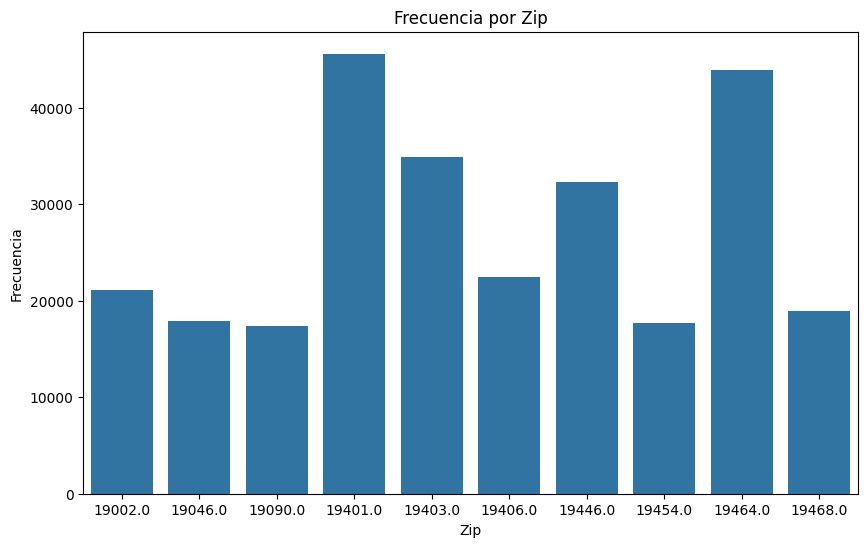

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(zip_frequent )
plt.title("Frecuencia por Zip")
plt.xlabel("Zip")
plt.ylabel("Frecuencia")

plt.show()

In [32]:
# Modelar la cantidad de llamadas que se recibiran en cierto intervalo de 19403.0


In [33]:
filtered_df = df[df['zip'] == 19401.0]
filtered_df

,lat,lng,desc,zip,title,timeStamp,twp,addr
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
18,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; Station 308A; ...,19401.0,EMS: VEHICLE ACCIDENT,2015-12-10 17:43:29,NORRISTOWN,PENN ST & ARCH ST
20,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...,19401.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:43:45,NORRISTOWN,PENN ST & ARCH ST
32,40.129398,-75.332213,PINE ST & W ROBERTS ST; NORRISTOWN; Station 3...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2015-12-10 18:17:07,NORRISTOWN,PINE ST & W ROBERTS ST
...,...,...,...,...,...,...,...,...
663471,40.121419,-75.356817,AIRY ST & HURST ALY; NORRISTOWN; 2020-07-29 @ ...,19401.0,Fire: FIRE INVESTIGATION,2020-07-29 13:31:40,NORRISTOWN,AIRY ST & HURST ALY
663474,40.113372,-75.341397,MAIN ST & GREEN ST; NORRISTOWN; Station 308A;...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2020-07-29 13:33:17,NORRISTOWN,MAIN ST & GREEN ST
663481,40.115375,-75.341525,AIRY ST & DEKALB ST; NORRISTOWN; Station 308A...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2020-07-29 14:13:09,NORRISTOWN,AIRY ST & DEKALB ST
663500,40.119456,-75.321759,NEW HOPE ST & LINDA LN; NORRISTOWN; 2020-07-29...,19401.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:13:44,NORRISTOWN,NEW HOPE ST & LINDA LN


In [ ]:
# Analizar en

In [35]:
# Distribucion poisson
'''Poisson: Numero de exitos en un intervalo de tiempo'''

filtered_df.dtypes

,0
lat,float64
lng,float64
desc,object
zip,float64
title,object
timeStamp,object
twp,object
addr,object


In [36]:
filtered_df['timeStamp'] = pd.to_datetime(filtered_df['timeStamp'])
filtered_df.dtypes

<ipython-input-36-a2efff3204fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['timeStamp'] = pd.to_datetime(filtered_df['timeStamp'])


,0
lat,float64
lng,float64
desc,object
zip,float64
title,object
timeStamp,datetime64[ns]
twp,object
addr,object


In [80]:
#Analizar, la probabilidad que existan más llamadas o algo así en diciembre

month_filter = filtered_df.groupby(filtered_df['timeStamp'].dt.month)['timeStamp'].count()
month_filter

,timeStamp
timeStamp,
1,4351
2,3771
3,4138
4,3782
5,4072
6,4195
7,4132
8,3494
9,3222


In [84]:
import numpy as np

array_numpy_month = month_filter.to_numpy()
print(array_numpy_month)

[4351 3771 4138 3782 4072 4195 4132 3494 3222 3383 3281 3785]


In [91]:
tasa_month  = {}
for i in range(len(array_numpy_month)):
  month= array_numpy_month[i]
  month_round = round(month/(5*31), 2)
  tasa_month[i+1] = month_round



In [92]:
print(tasa_month)

{1: 28.07, 2: 24.33, 3: 26.7, 4: 24.4, 5: 26.27, 6: 27.06, 7: 26.66, 8: 22.54, 9: 20.79, 10: 21.83, 11: 21.17, 12: 24.42}


In [100]:
# pd

tasa_pd = pd.DataFrame(list(tasa_month.items()), columns=['month', 'tasa'])
tasa_pd = tasa_pd.reset_index(drop=True)
tasa_pd.columns

Index(['month', 'tasa'], dtype='object')

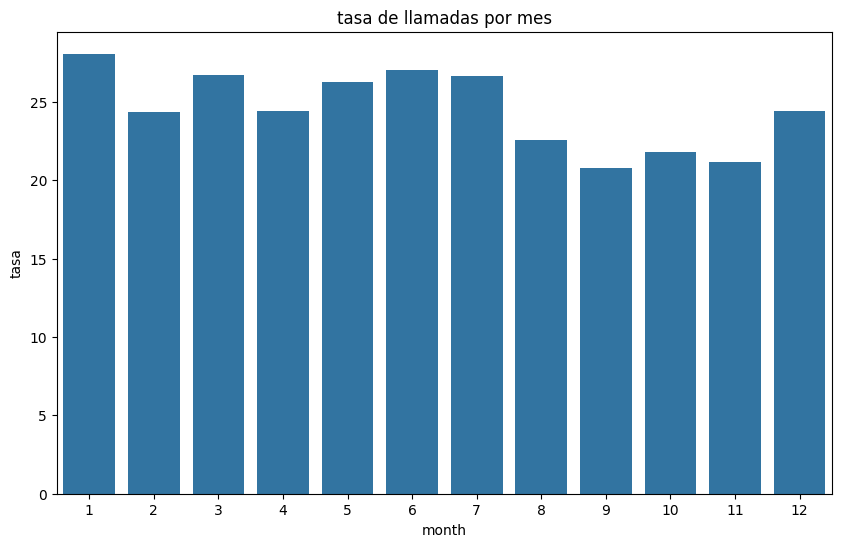

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data = tasa_pd, x= 'month', y = 'tasa')
plt.title('tasa de llamadas por mes')

plt.show()

In [78]:
diciembre = filtered_df[filtered_df['timeStamp'].dt.month == 12]
diciembre

,lat,lng,desc,zip,title,timeStamp,twp,addr
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
18,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; Station 308A; ...,19401.0,EMS: VEHICLE ACCIDENT,2015-12-10 17:43:29,NORRISTOWN,PENN ST & ARCH ST
20,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...,19401.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:43:45,NORRISTOWN,PENN ST & ARCH ST
32,40.129398,-75.332213,PINE ST & W ROBERTS ST; NORRISTOWN; Station 3...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2015-12-10 18:17:07,NORRISTOWN,PINE ST & W ROBERTS ST
...,...,...,...,...,...,...,...,...
591174,40.137047,-75.317159,DEKALB PIKE & COLONIAL DR; EAST NORRITON; Sta...,19401.0,EMS: SUBJECT IN PAIN,2019-12-31 18:17:10,EAST NORRITON,DEKALB PIKE & COLONIAL DR
591177,40.129448,-75.312010,NEW HOPE ST & SAW MILL CT; EAST NORRITON; Sta...,19401.0,EMS: GENERAL WEAKNESS,2019-12-31 18:22:21,EAST NORRITON,NEW HOPE ST & SAW MILL CT
591225,40.117892,-75.351165,MAIN ST & CHAIN ST; NORRISTOWN; Station 308A;...,19401.0,EMS: SUBJECT IN PAIN,2019-12-31 21:09:17,NORRISTOWN,MAIN ST & CHAIN ST
591234,40.116684,-75.335681,SMITH ST & E OAK ST; NORRISTOWN; Station 308A...,19401.0,EMS: RESPIRATORY EMERGENCY,2019-12-31 21:48:57,NORRISTOWN,SMITH ST & E OAK ST


In [74]:
# total llamadas

total_diciembre = diciembre['timeStamp'].count()
print(total_diciembre) ## Total de llamadas recibidas en diciembre a lo largo de 5 años

## Para calcular la tasa de un diciembre

tasa_diciembre = (total_diciembre/(5*31))
print(f"La tasa es: {tasa_diciembre:.2f}, considerando los 5 años")

3785
La tasa es: 24.42, considerando los 5 años


In [77]:
import scipy.stats as stats

# De tener al menos 30 llamadas
probabilidad_diciembre = stats.poisson.cdf(30, tasa_diciembre)
print(probabilidad_diciembre*100)


88.81382743442393


In [ ]:
# Analizar la tasa de llamdas, y entender que está pasando


In [112]:
hourly_counts = filtered_df.groupby(filtered_df['timeStamp'].dt.hour)['timeStamp'].count()
#dt.hour = Extrae la hora
poisson_rate = hourly_counts.mean()/5 # x año
#poisson_rate = poisson_rate/365
print(" ",poisson_rate)

380.05


In [111]:
hourly_counts

,timeStamp
timeStamp,
0,1300
1,1104
2,962
3,891
4,778
5,887
6,1135
7,1555
8,2058


In [ ]:
## Se espera que en una hora lleguen aproximadamente 1900.05

In [50]:
import scipy.stats as stats

probability = stats.poisson.pmf(1900.25, poisson_rate)
probability

0.0

P(X = k) = (e^-λ * λ^k) / k!

In [58]:
k= 2199
log_probability = stats.poisson.logpmf(k, poisson_rate)
probability = np.exp(log_probability)

print(f"La probabilidad de observar {k} eventos es: {probability}")

La probabilidad de observar 2199 eventos es: 1.6857687776164812e-12


In [59]:
from scipy.stats import norm

lambda_value = 1900.25    # Tasa esperada (muy grande)
x = 1020

# tcl
prob = norm.cdf(x + 0.5, loc=lambda_value, scale=lambda_value**0.5) - norm.cdf(x - 0.5, loc=lambda_value, scale=lambda_value**0.5)
print(prob)


2.6429188019543006e-91


In [56]:
probability = stats.norm.pdf(k, loc=poisson_rate, scale=np.sqrt(poisson_rate))

In [49]:
import scipy.stats as stats
import numpy as np

k = 1900  # Número de eventos
poisson_rate = 1900.25  # Tasa de Poisson

# Calcular la probabilidad usando la aproximación normal
probability = stats.norm.pdf(k, loc=poisson_rate, scale=np.sqrt(poisson_rate))

print(f"La probabilidad de observar {k} eventos es: {probability}")

La probabilidad de observar 1900 eventos es: 0.009151611031905581
